# Examples

In [ ]:
# !pip install drawline

In [1]:
try:
    import drawline
except:
    import sys
    sys.path.append('../')
    
from drawline.draw_process import draw_poly, draw_rect, draw_labelme    
from drawline.utils import labelme_to_contours, labelme_to_rect_points
import os
import cv2
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Image
import random


In [2]:
def display(im_data, title=None, fontsize=30):
    dpi = 80
    im_data = cv2.cvtColor(im_data, cv2.COLOR_BGR2RGB)
    height, width, depth = im_data.shape
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)
    # Create a figure of the right size with one axes that takes up the full figure
#     print(figsize)
#     fig = plt.figure(figsize=figsize)
    fig = plt.figure(figsize=(15, 9.6))
    ax = fig.add_axes([0, 0, 1, 1])
    # Hide spines, ticks, etc.
    ax.axis('off')
    # Display the image.
    ax.imshow(im_data, cmap='gray')
    if title is not None:
        plt.title(title, fontsize=fontsize)
    plt.show()

    
def add_random_confidence(labels):
    new_labels = []
    for label in labels:
        label = label + ' ' + str(random.uniform(0, 1))[:4]
        new_labels.append(label)
    return new_labels

## Draw Polygon 

In [3]:
image        = cv2.imread('../test_images/polygon/eg_2.jpg')
labelme_dict = json.load(open('../test_images/polygon/eg_2.json'))
contours, labels = labelme_to_contours(labelme_dict)

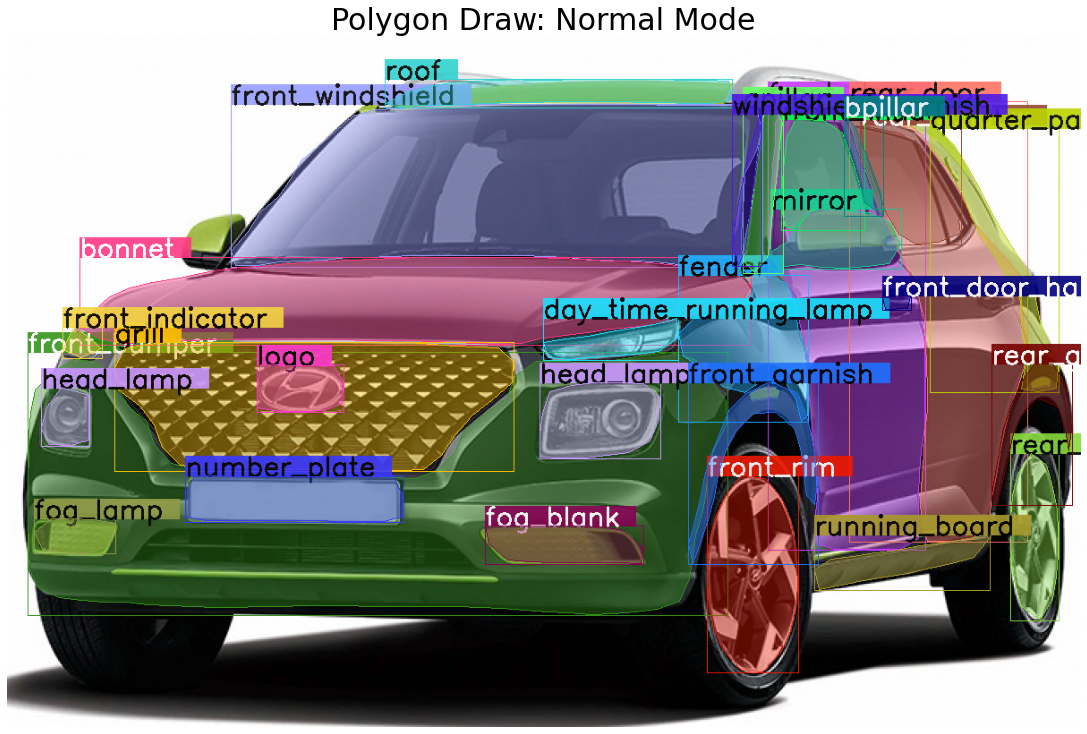

In [5]:
# Polygon normal mode
draw_image = draw_poly(image, contours, labels=labels, graph_mode=False)
title = 'Polygon Draw: Normal Mode'
display(draw_image, title)

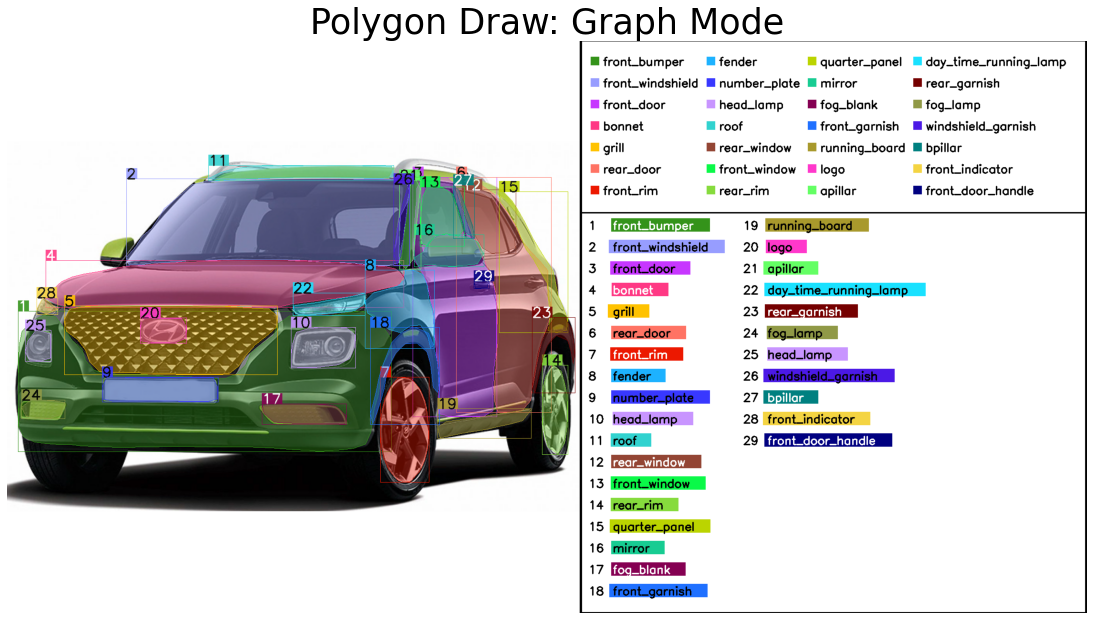

In [6]:
# Polygon graph mode 
# Good to use when many Labels exists or when the labels obstructs the view
draw_image = draw_poly(image, contours, labels=labels, graph_mode=True)
title = 'Polygon Draw: Graph Mode'
display(draw_image, title, 35)

In [7]:
image        = cv2.imread('../test_images/polygon/meme.jpg')
labelme_dict = json.load(open('../test_images/polygon/meme.json'))
contours, labels = labelme_to_contours(labelme_dict)

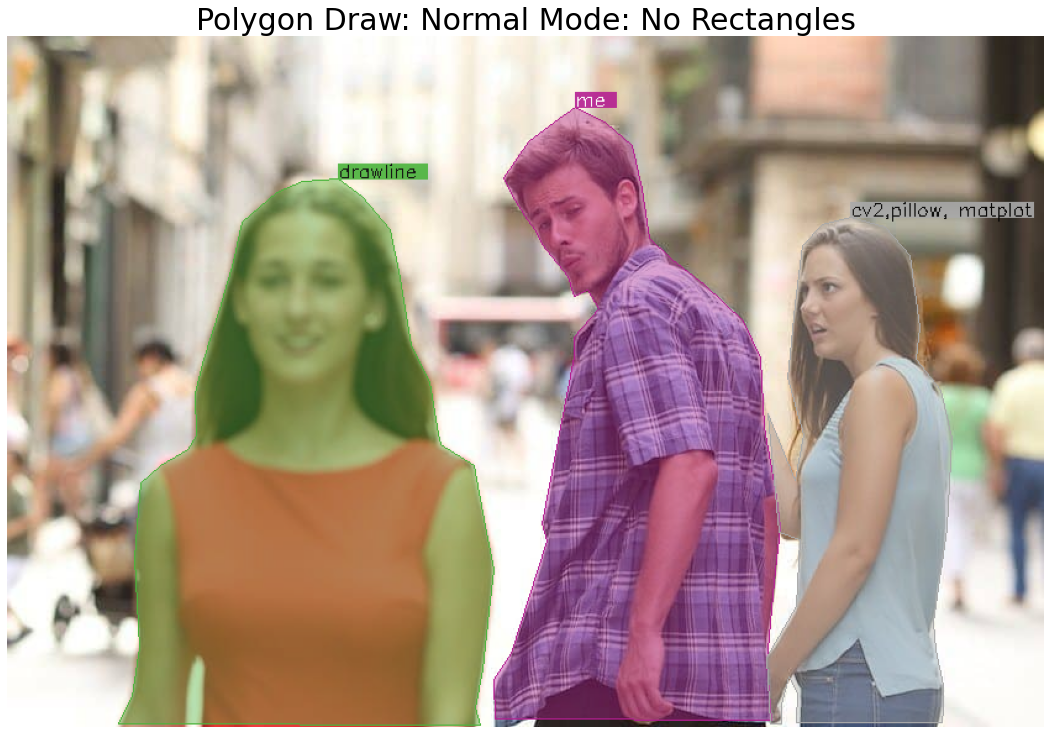

In [8]:
# other options: No Rectangles
draw_image = draw_poly(image, contours, labels=labels, show_rect=False)
title = 'Polygon Draw: Normal Mode: No Rectangles'
display(draw_image, title)

## Draw Rectangle

In [9]:
polygon_image_path = '../test_images/rectangle/harold.jpg'
labelme_path       = '../test_images/rectangle/harold.json'

image        = cv2.imread(polygon_image_path)
labelme_dict = json.load(open(labelme_path))

points, labels = labelme_to_rect_points(labelme_dict)
labels = add_random_confidence(labels)


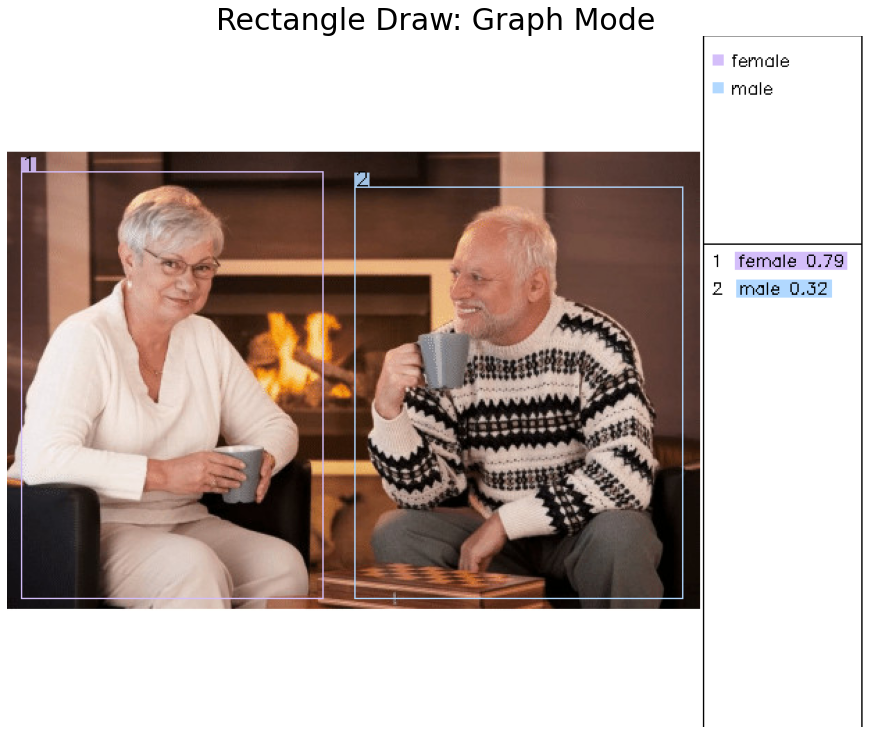

In [10]:
# Rectangle normal
draw_image = draw_rect(image, points, labels=labels, graph_mode=True)
title = 'Rectangle Draw: Graph Mode'
display(draw_image, title)

In [11]:
polygon_image_path = '../test_images/rectangle/sheep.jpg'
labelme_path       = '../test_images/rectangle/sheep.json'

image        = cv2.imread(polygon_image_path)
labelme_dict = json.load(open(labelme_path))

points, labels = labelme_to_rect_points(labelme_dict)
labels = add_random_confidence(labels)

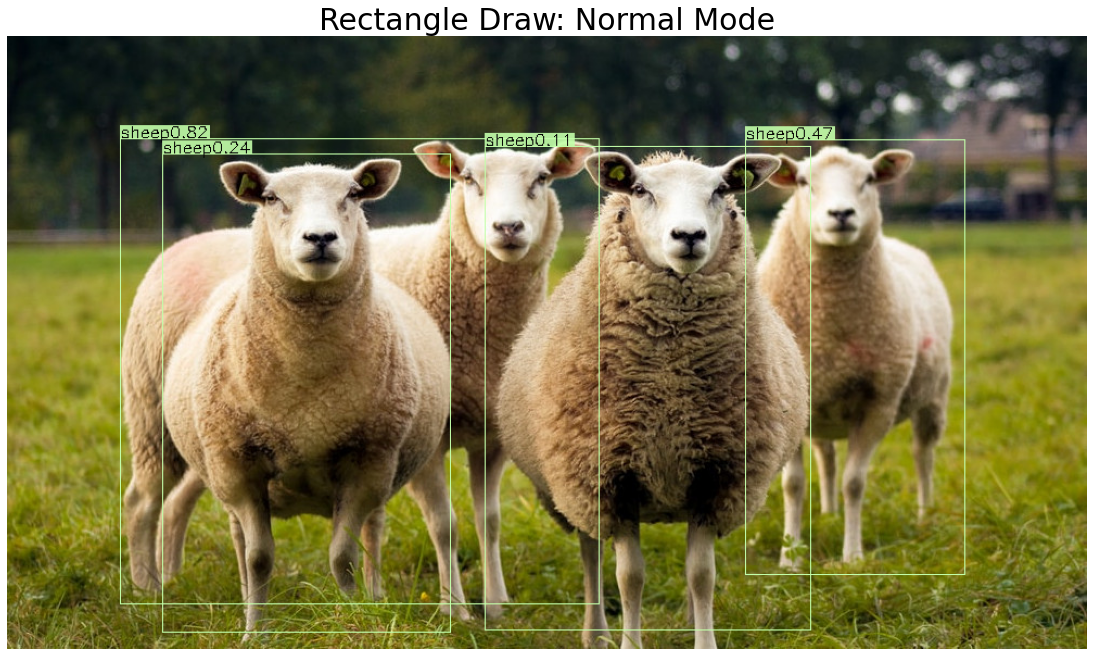

In [12]:
# Rectangle normal
draw_image = draw_rect(image, points, labels=labels, graph_mode=False)
title = 'Rectangle Draw: Normal Mode'
display(draw_image, title)

## Draw Labelme

In [13]:
# input the labelme json file directly
polygon_image_path = '../test_images/polygon/meme.jpg'
labelme_path       = '../test_images/polygon/meme.json'

image = cv2.imread(polygon_image_path)

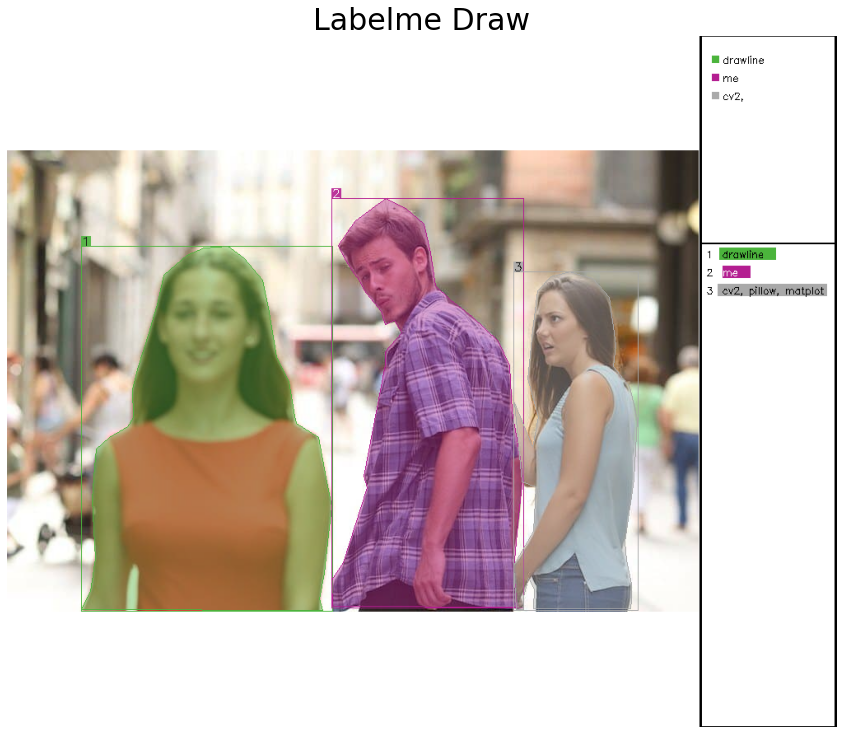

In [14]:
draw_image = draw_labelme(image, labelme_path, graph_mode=True)
title = 'Labelme Draw'
display(draw_image, title)

### More options to customize

In [ ]:
def draw_poly(image, contours, fill_in=True, label_transparency=0.1, fill_transparency=0.4, rgb=None,
              thickness=None, show_rect=True, labels=None, label_rgb=None, label_bg_rgb=None, 
              label_font_size=None, random_color=False, graph_mode=False):
    """
    Draws polygon and fills in color from given contours
    :param image: (Numpy) numpy matrix image
    :param contours: (List) of contours
    :param fill_in: (Boolean) fill color inside the polygon.
    :param label_transparency: (float) transparency for the labels
    :param fill_transparency: (Float) transparency of fill_in color.
    :param rgb: RGB values: (Tuple) rgb color of line and polyfgon (R, G, B)
    :param thickness: (Int) Thickness of line
    :param show_rect: (Boolean) Show rectangle
    :param labels: (List of strings) List of label names
    :param label_rgb: (Tuple) RGB color of labels
    :param label_bg_rgb: (Tuple) RGB color of Label background
    :param label_font_size: (Int) Label font size
    :param random_color: (Boolean) Randomize RGB color
    :param graph_mode: (Boolean) Writes labels to a border instead in the image itself (Good to use when to many boxes obstructing the view)

    :return: (Numpy) drawn polygon on image
    """
    
    
def draw_rect(image, points, rgb=None, label_transparency=0.1, thickness=None, labels=None, label_rgb=None,
              label_bg_rgb=None, label_font_size=None, random_color=False, graph_mode=False):
    """
    Draws rectangle from given coordinates
    :param image: (Numpy) numpy matrix image
    :param points: (List) List of rectangle coordinates: [[xmin, ymin, xmax, ymax]]
    :param rgb: (Tuple) RGB values: (R, G, B)
    :param label_transparency: (float) transparency for the labels
    :param thickness: (Integer) of line in px: eg: 2
    :param labels: (List) list of strings: []
    :param label_rgb: (Tuple) RGB text color for labels: (R,G,B)
    :param label_bg_rgb: (Tuple) RGB label background color: (R,G,B)
    :param label_font_size: (Integer) Font size of label in px: 2
    :param random_color: (Boolean) pick random colors for lines.
    :param graph_mode: (Boolean) Writes labels to a border instead in the image itself (Good to use when to many boxes obstructing the view)

    :return: (numpy) drawn rectangles on image
    """
